# Sign Language

In [3]:
!wget https://raw.githubusercontent.com/anisham197/WTMExtendedSummit/master/data/sign-language-mnist.zip

--2019-03-26 13:37:45--  https://raw.githubusercontent.com/anisham197/WTMExtendedSummit/master/data/sign-language-mnist.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32286533 (31M) [application/zip]
Saving to: ‘sign-language-mnist.zip’

sign-language-mnist 100%[===================>]  30.79M  28.2MB/s    in 1.1s    

2019-03-26 13:37:46 (28.2 MB/s) - ‘sign-language-mnist.zip’ saved [32286533/32286533]



In [0]:
mkdir input

In [6]:
!unzip sign-language-mnist.zip -d input/

Archive:  sign-language-mnist.zip
  inflating: input/amer_sign2.png    
  inflating: input/amer_sign3.png    
  inflating: input/american_sign_language.PNG  
  inflating: input/sign_mnist_test.csv  
  inflating: input/sign_mnist_train.csv  


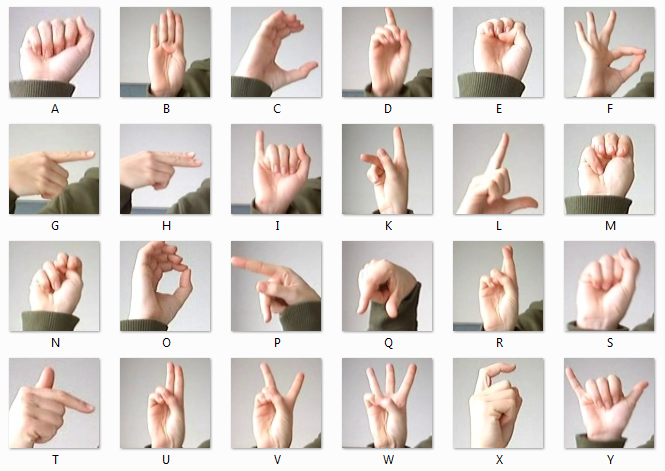

In [7]:
from IPython.display import Image
Image("./input/amer_sign2.png")

# About the data

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

In [0]:
from IPython.display import Image
Image("./input/amer_sign3.png")

In [0]:
from IPython.display import Image
Image("./input/american_sign_language.PNG")

### Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Load the Dataset

In [0]:
train = pd.read_csv('./input/sign_mnist_train.csv')
test = pd.read_csv('./input/sign_mnist_test.csv')

In [57]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [12]:
train.shape

(27455, 785)

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

In [38]:
y_train = train['label'].values
y_test = test['label'].values
print('Train Labels:\n', y_train)
print('Shape of Labels:', y_train.shape)
print('Test Labels:\n', y_test)
print('Shape of Test Labels:', y_test.shape)

Train Labels:
 [ 3  6  2 ... 18 17 23]
Shape of Labels: (27455,)
Test Labels:
 [ 6  5 10 ...  2  4  2]
Shape of Test Labels: (7172,)


# Data Exploration

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


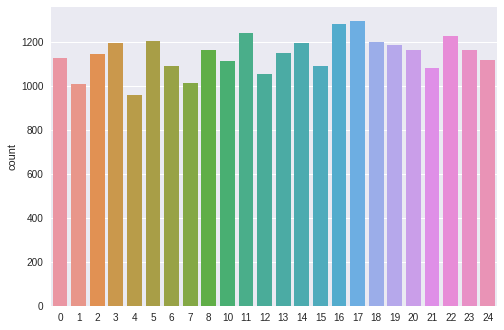

In [22]:
sns.countplot(x = y_train)
plt.show()

In [46]:
x_train = (train.drop('label', axis = 1, inplace = False)).values
x_test = (test.drop('label', axis = 1, inplace = False)).values

print('Train Feature matrix:\n', x_train)
print('Train Shape of Feature matrix:', x_train.shape)
print('Test Feature matrix:\n', x_test)
print('Test Shape of Feature matrix:', x_test.shape)

Train Feature matrix:
 [[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
Train Shape of Feature matrix: (27455, 784)
Test Feature matrix:
 [[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]]
Test Shape of Feature matrix: (7172, 784)


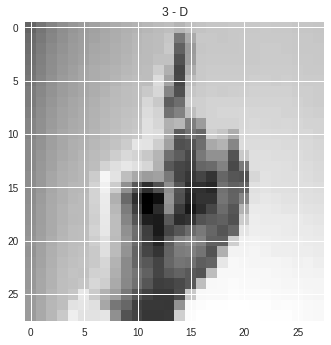

In [35]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title(str(y_train[0]) + ' - ' + chr(y_train[0] + ord('A')))
plt.show()

Since our target variable are in categorical(nomial) we encode it as one hot vectors

In [55]:
def one_hot_encode(y):
    return np.eye(26)[y]
y_train_encoded = one_hot_encode(y_train)
y_test_encoded = one_hot_encode(y_test)
print('Shape of y after encoding:', y_train_encoded.shape)
print('Shape of y test after encoding:', y_test_encoded.shape)

Shape of y after encoding: (27455, 26)
Shape of y test after encoding: (7172, 26)


In [56]:
y_train_encoded[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Multi Layer Perceptron with TensorFlow

In [0]:
# Hyperparameters
learning_rate = 0.001
batch_size = 128
epochs = 2500
display_step = 500

In [0]:
# Network Hyperparameters
n_inputs = 784
nh1 = 256
nh2 = 256
nh3 = 256
nh4 = 256
nh5 = 256
n_outputs = 26

In [0]:
X = tf.placeholder('float', [None, n_inputs])
Y = tf.placeholder('float', [None, n_outputs])

In [63]:
weights = {
    'w1' : tf.Variable(tf.random_normal([n_inputs, nh1])),
    'w2' : tf.Variable(tf.random_normal([nh1, nh2])),
    'w3' : tf.Variable(tf.random_normal([nh2, nh3])),
    'w4' : tf.Variable(tf.random_normal([nh3, nh4])),
    'w5' : tf.Variable(tf.random_normal([nh4, nh5])),
    'out_w' : tf.Variable(tf.random_normal([nh5, n_outputs]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
biases = {
    'b1' : tf.Variable(tf.random_normal([nh1])),
    'b2' : tf.Variable(tf.random_normal([nh2])),
    'b3' : tf.Variable(tf.random_normal([nh3])),
    'b4' : tf.Variable(tf.random_normal([nh4])),
    'b5' : tf.Variable(tf.random_normal([nh5])),
    'out_b' : tf.Variable(tf.random_normal([n_outputs]))
}

In [0]:
def neural_network(x, weights, biases):
    layer1 = tf.nn.relu(tf.add(tf.matmul(x, weights['w1']), biases['b1']))
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, weights['w2']), biases['b2']))
    layer3 = tf.nn.relu(tf.add(tf.matmul(layer2, weights['w3']), biases['b3']))
    layer4 = tf.nn.relu(tf.add(tf.matmul(layer3, weights['w4']), biases['b4']))
    layer5 = tf.nn.relu(tf.add(tf.matmul(layer4, weights['w5']), biases['b5']))
    layer_out = tf.matmul(layer5, weights['out_w']) + biases['out_b']
    return layer_out

In [66]:
logits = neural_network(X, weights, biases)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss_op)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
init = tf.global_variables_initializer()

In [0]:
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [69]:
with tf.Session() as sess:
    
    sess.run(init)
    
    cost_hist, acc_hist = [], []
    
    for epoch in range(1, epochs + 1):
        batch_x, batch_y = next_batch(batch_size, x_train, y_train_encoded)
        
        sess.run(training_op, feed_dict = { X : batch_x, Y : batch_y })
        
        if epoch % display_step == 0:
            c, acc = sess.run([loss_op, accuracy], feed_dict = { X : batch_x, Y : batch_y })
            cost_hist.append(c)
            acc_hist.append(acc)
            print('Epoch ' + str(epoch) + ', Cost: ' + str(c) + ', Accuracy: ' + str(acc))
    
    W = sess.run(weights)
    B = sess.run(biases)
    print('Accuracy on train data: ' + str(sess.run(accuracy, feed_dict = { X : x_train, Y : y_train_encoded }) * 100) + ' %')
    print('Accuracy on test data: ' + str(sess.run(accuracy, feed_dict = { X : x_test, Y : y_test_encoded }) * 100) + ' %')


Epoch 500, Cost: 8083805.0, Accuracy: 0.6875
Epoch 1000, Cost: 1600535.1, Accuracy: 0.875
Epoch 1500, Cost: 592332.9, Accuracy: 0.9375
Epoch 2000, Cost: 212335.25, Accuracy: 0.984375
Epoch 2500, Cost: 68188.25, Accuracy: 0.9921875
Epoch 3000, Cost: 366633.0, Accuracy: 0.9765625
Epoch 3500, Cost: 38799.875, Accuracy: 0.9921875
Epoch 4000, Cost: 223302.25, Accuracy: 0.984375
Epoch 4500, Cost: 35455.875, Accuracy: 0.9921875
Epoch 5000, Cost: 66605.0, Accuracy: 0.984375
Epoch 5500, Cost: 27953.75, Accuracy: 0.9921875
Epoch 6000, Cost: 55942.875, Accuracy: 0.984375
Epoch 6500, Cost: 239388.12, Accuracy: 0.984375
Epoch 7000, Cost: 82342.25, Accuracy: 0.9921875
Epoch 7500, Cost: 17843.0, Accuracy: 0.9921875
Epoch 8000, Cost: 114008.5, Accuracy: 0.984375
Epoch 8500, Cost: 299128.12, Accuracy: 0.9609375
Epoch 9000, Cost: 0.0, Accuracy: 1.0
Epoch 9500, Cost: 288662.12, Accuracy: 0.9921875
Epoch 10000, Cost: 0.0, Accuracy: 1.0
Accuracy on train data: 98.1533408164978 %
Accuracy on test data: 69.3

## Performance Visualization

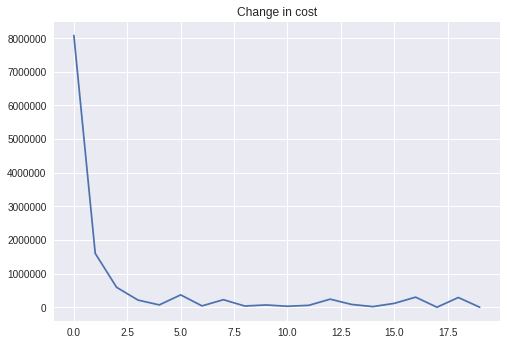

In [70]:
plt.plot(list(range(len(cost_hist))), cost_hist)
plt.title("Change in cost")
plt.show()

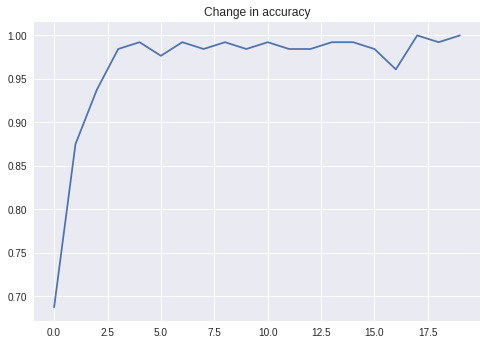

In [71]:
plt.plot(list(range(len(acc_hist))), acc_hist)
plt.title("Change in accuracy")
plt.show()

## Inference

In [0]:
def neural_network(x, weights, biases):
    layer1 = np.matmul(x, weights['w1']) + biases['b1']
    layer2 = np.matmul(layer1, weights['w2']) + biases['b2']
    layer3 = np.matmul(layer2, weights['w3']) + biases['b3']
    layer4 = np.matmul(layer3, weights['w4']) + biases['b4']
    layer5 = np.matmul(layer4, weights['w5']) + biases['b5']
    layer_out = np.matmul(layer5, weights['out_w']) + biases['out_b']
    return layer_out

In [0]:
def get_predictions(x, w, b):
    pred = neural_network(x, w, b)
    images, predictions = [], []
    for i in x:
        images.append(i.reshape(28, 28))
    for i in pred:
        predictions.append(list(i))
    predictions = [chr(int(i.index(max(i))) + ord('A')) for i in predictions]
    return (images, predictions)

In [0]:
images, predictions = get_predictions(x_test, W, B)

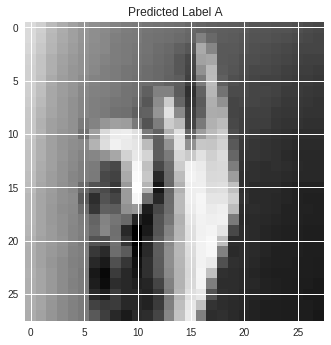

Actual Label: K


In [80]:
plt.imshow(images[6])
plt.title("Predicted Label: " + predictions[6])
plt.show()
print("Actual Label: " + chr(y_test[6] + ord('A')))

In [0]:
for key in W.keys():
    np.save(key, W[key])

In [0]:
for key in B.keys():
    np.save(key, B[key])

# Multi Layer Perceptron with Keras

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

In [0]:
train = pd.read_csv('./input/sign_mnist_train.csv')
test = pd.read_csv('./input/sign_mnist_test.csv')
y = train['label'].values
y_test = test['label'].values
x = (train.drop('label', axis = 1, inplace = False)).values
x_test = (test.drop('label', axis = 1, inplace = False)).values

In [157]:
# from sklearn.preprocessing import LabelBinarizer
# label_binrizer = LabelBinarizer()
# y = label_binrizer.fit_transform(y)
# y_test = label_binrizer.fit_transform(y_test)

# def one_hot_encode(y):
#     return np.eye(26)[y]
# y = one_hot_encode(y)
# y_test = one_hot_encode(y_test)
# print('Shape of y after encoding:', y.shape)
# print('Shape of y test after encoding:', y_test.shape)

Shape of y after encoding: (27455, 26)
Shape of y test after encoding: (7172, 26)


In [0]:
num_classes = 26
y = keras.utils.to_categorical(y, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [166]:
y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [0]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

In [170]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(19218, 784)
(8237, 784)
(19218, 26)
(8237, 26)


In [171]:
x_train[0]

array([0.23137255, 0.38431373, 0.37254903, 0.10980392, 0.12156863,
       0.24705882, 0.25490198, 0.27450982, 0.29803923, 0.31764707,
       0.3529412 , 0.4117647 , 0.43529412, 0.45490196, 0.47058824,
       0.48235294, 0.49411765, 0.5058824 , 0.5176471 , 0.5254902 ,
       0.53333336, 0.5411765 , 0.5529412 , 0.5568628 , 0.5647059 ,
       0.5686275 , 0.57254905, 0.5764706 , 0.25882354, 0.39607844,
       0.35686275, 0.08627451, 0.14509805, 0.25490198, 0.2627451 ,
       0.2784314 , 0.30588236, 0.32156864, 0.35686275, 0.41568628,
       0.4392157 , 0.45882353, 0.47058824, 0.49411765, 0.5019608 ,
       0.50980395, 0.52156866, 0.5294118 , 0.5372549 , 0.5568628 ,
       0.5568628 , 0.5647059 , 0.5647059 , 0.5686275 , 0.5764706 ,
       0.5803922 , 0.30980393, 0.4117647 , 0.3372549 , 0.06666667,
       0.17254902, 0.25882354, 0.2627451 , 0.28235295, 0.30588236,
       0.3254902 , 0.36862746, 0.41960785, 0.4392157 , 0.46666667,
       0.48235294, 0.49803922, 0.50980395, 0.5176471 , 0.52156

In [172]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

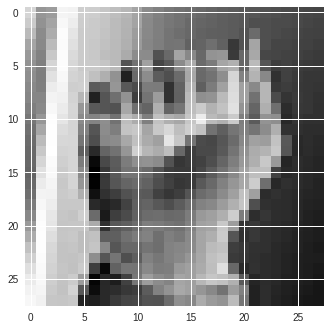

In [138]:
plt.imshow(x_train[0].reshape(28,28))

In [0]:
# Hyperparameters
# learning_rate = 0.1
batch_size = 128
epochs = 50


In [198]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
# model.add(Dense(512,  activation='relu'))
# model.add(Dense(256,  activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512,  activation='relu'))
# model.add(Dense(256,  activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(num_classes,  activation='softmax'))

# optimizer = optimizers.Adam(lr=learning_rate)
model.compile(optimizer=optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 26)                13338     
Total params: 677,914
Trainable params: 677,914
Non-trainable params: 0
_________________________________________________________________


In [200]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=2, 
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
 - 3s - loss: 1.8558 - acc: 0.4051 - val_loss: 1.7390 - val_acc: 0.4065
Epoch 2/50
 - 3s - loss: 1.5562 - acc: 0.4966 - val_loss: 1.7020 - val_acc: 0.4425
Epoch 3/50
 - 3s - loss: 1.3095 - acc: 0.5686 - val_loss: 1.7407 - val_acc: 0.3867
Epoch 4/50
 - 3s - loss: 1.1439 - acc: 0.6197 - val_loss: 1.6232 - val_acc: 0.4844
Epoch 5/50
 - 3s - loss: 0.9902 - acc: 0.6654 - val_loss: 1.4475 - val_acc: 0.5541
Epoch 6/50
 - 3s - loss: 0.8742 - acc: 0.7049 - val_loss: 0.7085 - val_acc: 0.7622
Epoch 7/50
 - 3s - loss: 0.7716 - acc: 0.7354 - val_loss: 0.9309 - val_acc: 0.6714
Epoch 8/50
 - 3s - loss: 0.6891 - acc: 0.7626 - val_loss: 0.6051 - val_acc: 0.7973
Epoch 9/50
 - 3s - loss: 0.6208 - acc: 0.7933 - val_loss: 0.5008 - val_acc: 0.8117
Epoch 10/50
 - 3s - loss: 0.5504 - acc: 0.8139 - val_loss: 0.4768 - val_acc: 0.8345
Epoch 11/50
 - 3s - loss: 0.4978 - acc: 0.8305 - val_loss: 0.8401 - val_acc: 0.7407
Epoch 12/50
 - 3s - loss: 0.4402 - a

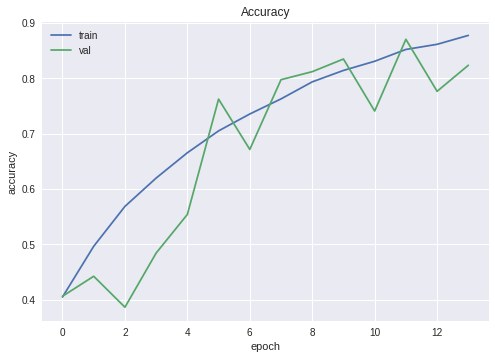

In [201]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [0]:
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [205]:
x_test.shape

(7172, 784)

In [0]:
x_test = x_test.astype('float32')
x_test = x_test / 255

In [0]:
y_pred = model.predict(x_test)

In [208]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.6327384272169548

In [209]:
!pip install tensorflowjs==0.8.5

In [0]:
import tensorflowjs as tfjs

In [0]:
tfjs.converters.save_keras_model(model, 'mlp.tfjs')

# CNN with Keras

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [0]:
train = pd.read_csv('./input/sign_mnist_train.csv')
test = pd.read_csv('./input/sign_mnist_test.csv')
y = train['label'].values
y_test = test['label'].values
x = (train.drop('label', axis = 1, inplace = False)).values
x_test = (test.drop('label', axis = 1, inplace = False)).values

In [0]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
y = label_binrizer.fit_transform(y)
y_test = label_binrizer.fit_transform(y_test)

In [0]:
batch_size = 128
num_classes = 24
epochs = 10

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [0]:
x_train = x_train / 255
x_val = x_val / 255

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

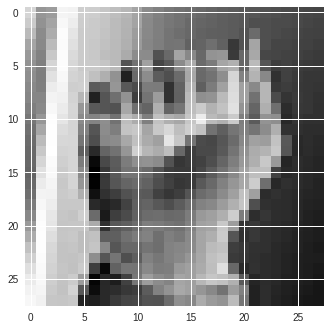

In [91]:
plt.imshow(x_train[0].reshape(28,28))

In [92]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [96]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 33s 2ms/step - loss: 1.3207 - acc: 0.5620 - val_loss: 0.7921 - val_acc: 0.7606
Epoch 2/10
19218/19218 [==============================] - 33s 2ms/step - loss: 0.7934 - acc: 0.7338 - val_loss: 0.5828 - val_acc: 0.8048
Epoch 3/10
19218/19218 [==============================] - 34s 2ms/step - loss: 0.5389 - acc: 0.8191 - val_loss: 0.3266 - val_acc: 0.9013
Epoch 4/10
19218/19218 [==============================] - 33s 2ms/step - loss: 0.3628 - acc: 0.8763 - val_loss: 0.2452 - val_acc: 0.9261
Epoch 5/10
19218/19218 [==============================] - 33s 2ms/step - loss: 0.2554 - acc: 0.9164 - val_loss: 0.1422 - val_acc: 0.9602
Epoch 6/10
19218/19218 [==============================] - 34s 2ms/step - loss: 0.1843 - acc: 0.9397 - val_loss: 0.1000 - val_acc: 0.9754
Epoch 7/10
19218/19218 [==============================] - 33s 2ms/step - loss: 0.1255 - acc: 0.9609 - val_loss: 0.0802 - val_acc:

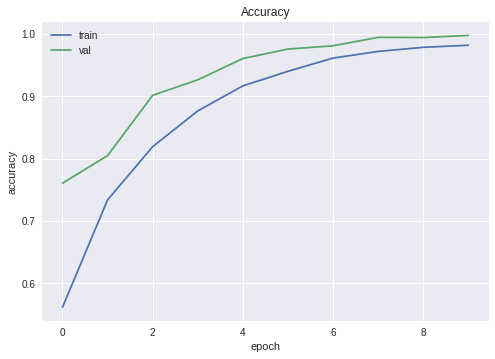

In [97]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [0]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [110]:
x_test.shape

(7172, 28, 28, 1)

In [0]:
x_test = x_test / 255

In [0]:
y_pred = model.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.8773006134969326

In [102]:
!pip install tensorflowjs==0.8.5

    100% |████████████████████████████████| 61kB 4.7MB/s 
    100% |████████████████████████████████| 307kB 7.6MB/s 
    100% |████████████████████████████████| 13.9MB 2.5MB/s 
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.7 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.9 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: tensorflow-hub 0.3.0
    Uninstalling tensorflow-hub-0.3.0:
      Successfully uninstalled tensorflow-hub-0.3.0
  F

In [0]:
import tensorflowjs as tfjs

In [0]:
tfjs.converters.save_keras_model(model, 'cnn.tfjs')